* Works only if data is linearly seperable
* Expensive to calculate with lots of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/perceptron.csv', header=None)

In [3]:
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if (y[i] - y_hat) == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif (y[i] - y_hat) == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b


In [4]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [5]:
X = data.iloc[:, [0, 1]].values
y = data.iloc[:, 2].values

In [6]:
boundaries = trainPerceptronAlgorithm(X, y)

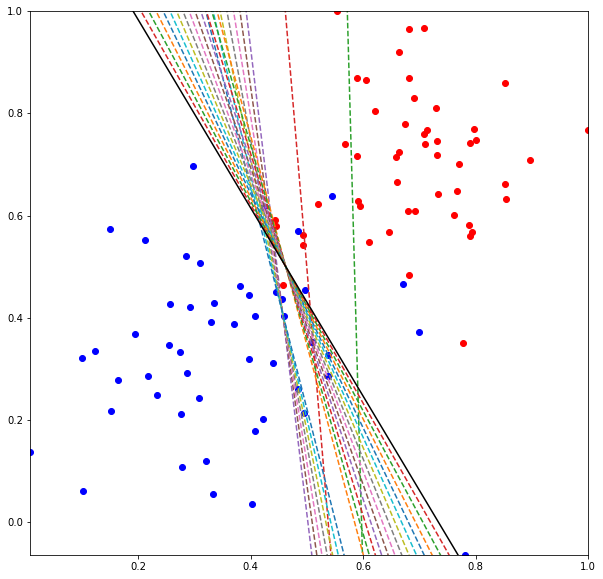

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0].values, data[data.iloc[:, 2] == 0].iloc[:, 1].values, c='red')
plt.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0].values, data[data.iloc[:, 2] == 1].iloc[:, 1].values, c='blue')


x_min, x_max = min(X.T[0]), max(X.T[0])
y_min, y_max = min(X.T[1]), max(X.T[1])

l = len(boundaries)

for idx, b in enumerate(boundaries):
    axes = plt.gca()
    x_vals = [i for i in np.arange(x_min, x_max, 0.1)]
    y_vals = b[1] + b[0] * x_vals
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([y_min,y_max])
    if idx == (l-1):
        plt.plot(x_vals, y_vals, c='black')
    else:
        plt.plot(x_vals, y_vals, '--')
plt.show()